In [9]:
import pandas as pd

df = pd.read_csv('/content/shopping_behavior.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nLast 5 rows of the DataFrame:")
print(df.tail())

print("\nConcise summary of the DataFrame:")
df.info()

First 5 rows of the DataFrame:
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount

In [10]:
total_missing = df.isnull().sum().sum()
print(f"Total number of missing values in the DataFrame: {total_missing}")

missing_values_per_column = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values_per_column[missing_values_per_column > 0])

if total_missing == 0:
    print("\nNo missing values found in the DataFrame. No action needed.")
else:
    print("\nMissing values found. Further action might be required.")

Total number of missing values in the DataFrame: 0

Missing values per column:
Series([], dtype: int64)

No missing values found in the DataFrame. No action needed.


In [11]:
print("\nHandling duplicate rows:")
duplicate_rows = df.duplicated().sum()

if duplicate_rows > 0:
    print(f"Found {duplicate_rows} duplicate rows. Removing them...")
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed successfully.")
    print(f"DataFrame now has {len(df)} rows.")
else:
    print("No duplicate rows found in the DataFrame. No action needed.")


Handling duplicate rows:
No duplicate rows found in the DataFrame. No action needed.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries numpy, matplotlib.pyplot, and seaborn imported successfully.")

Libraries numpy, matplotlib.pyplot, and seaborn imported successfully.


Outlier Detection using Z-score method:
  Column 'Age': 0 outliers found (Z-score > 3 or < -3).
  Column 'Purchase Amount (USD)': 0 outliers found (Z-score > 3 or < -3).
  Column 'Review Rating': 0 outliers found (Z-score > 3 or < -3).
  Column 'Previous Purchases': 0 outliers found (Z-score > 3 or < -3).

Visualizing outliers with boxplots:


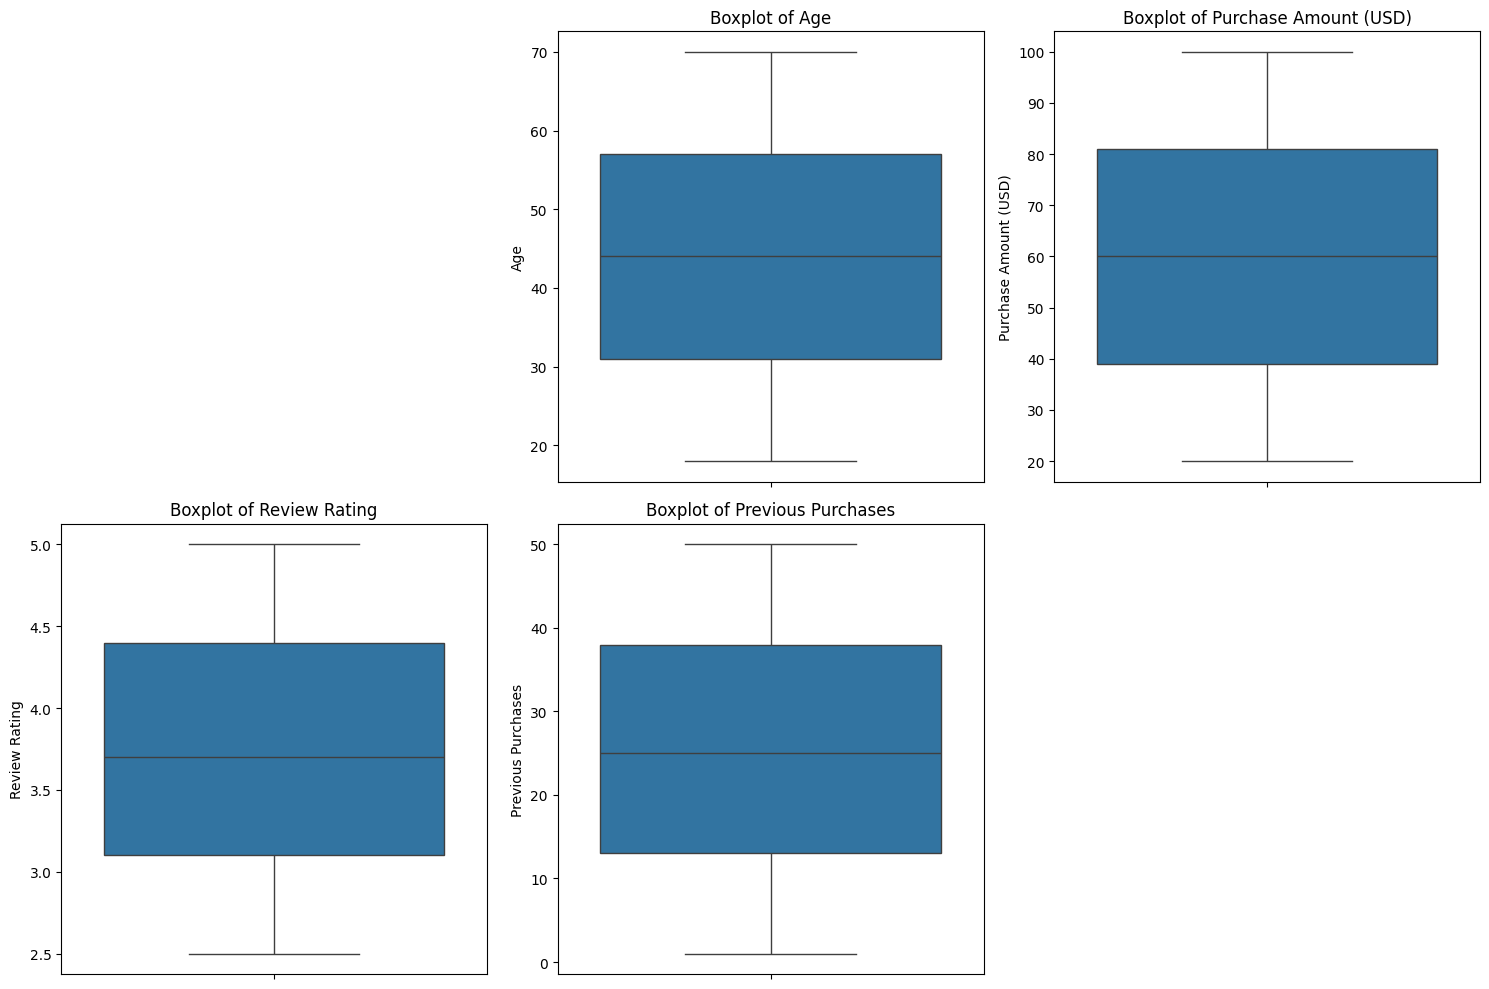

In [13]:
numerical_cols = df.select_dtypes(include=np.number).columns

print("Outlier Detection using Z-score method:")
for col in numerical_cols:
    if col == 'Customer ID':
        continue


    mean_val = df[col].mean()
    std_val = df[col].std()


    if std_val == 0:
        print(f"  Column '{col}': Standard deviation is 0, no outliers can be detected.")
        continue

    z_scores = (df[col] - mean_val) / std_val


    threshold = 3
    outliers = df[(z_scores > threshold) | (z_scores < -threshold)]

    print(f"  Column '{col}': {len(outliers)} outliers found (Z-score > {threshold} or < -{threshold}).")


print("\nVisualizing outliers with boxplots:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    if col == 'Customer ID':
        continue
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


In [14]:
print("\nDescriptive statistics for numerical columns:")
print(df.describe())

print("\nDescriptive statistics for categorical columns:")
print(df.describe(include=['object']))

print("\nUnique values and their frequencies for categorical columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())

print("\nCorrelation matrix for numerical columns:")
print(df.select_dtypes(include=np.number).corr())


Descriptive statistics for numerical columns:
       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  

Descriptive statistics for categorical col

Generating visualizations...


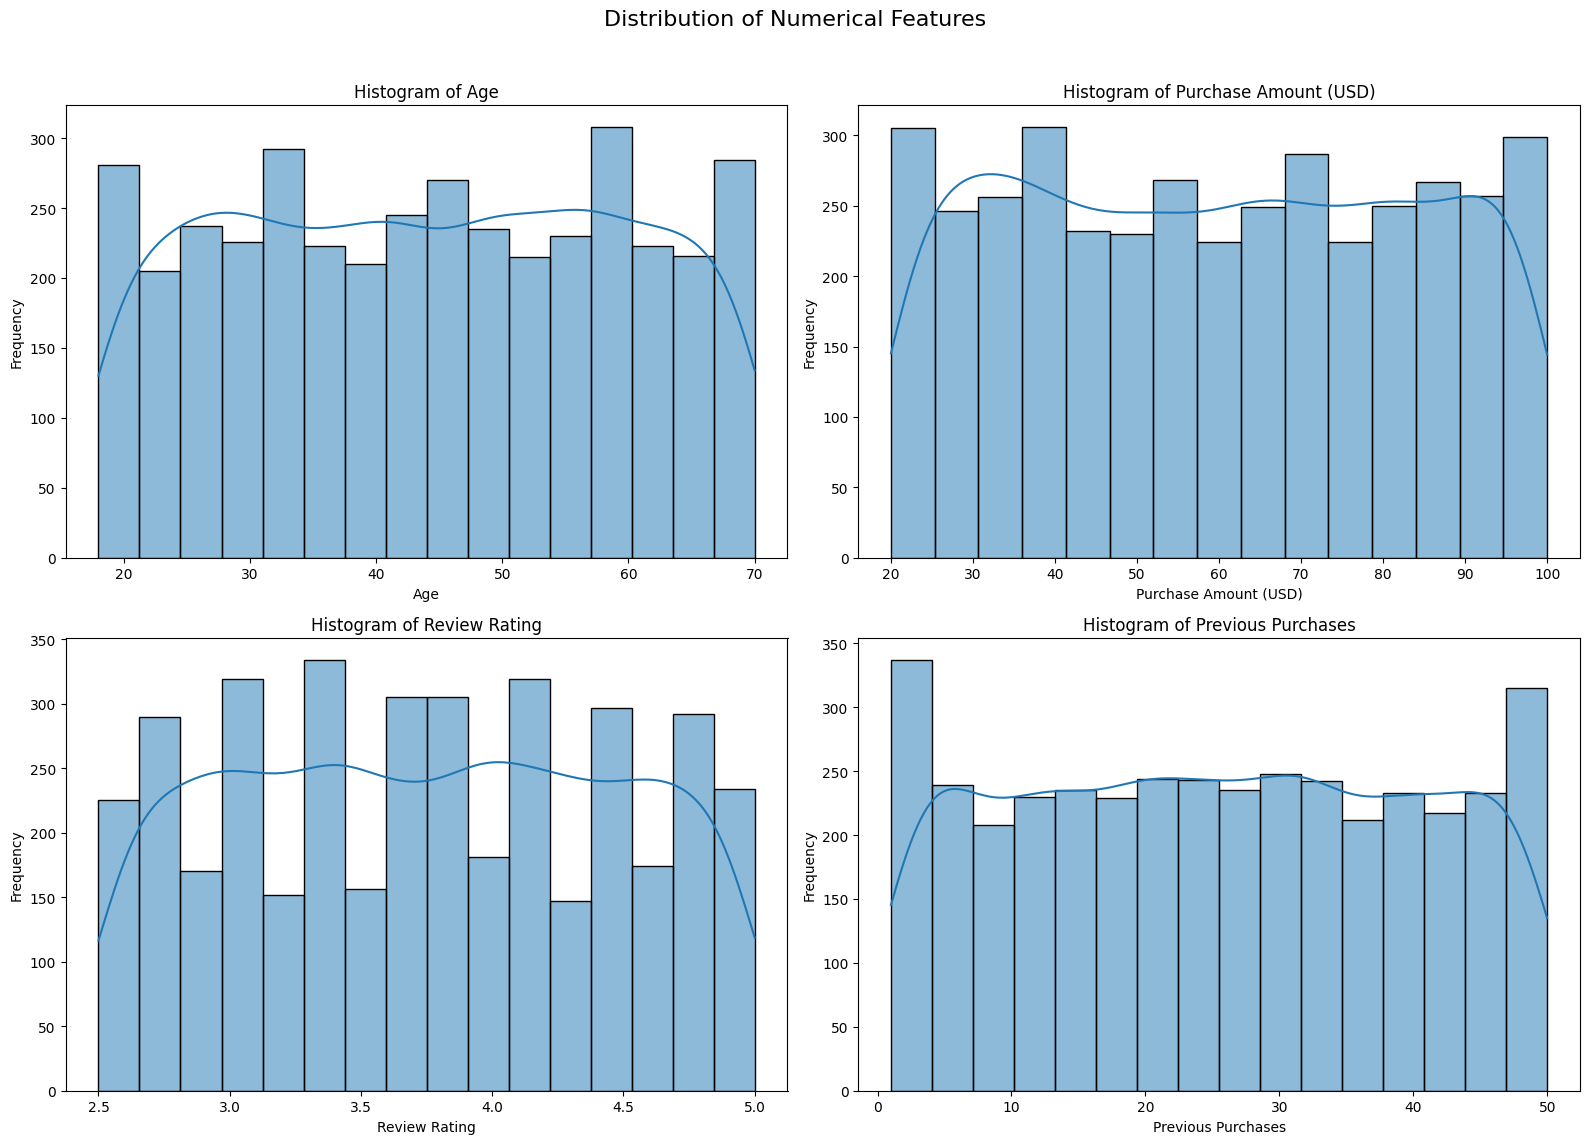

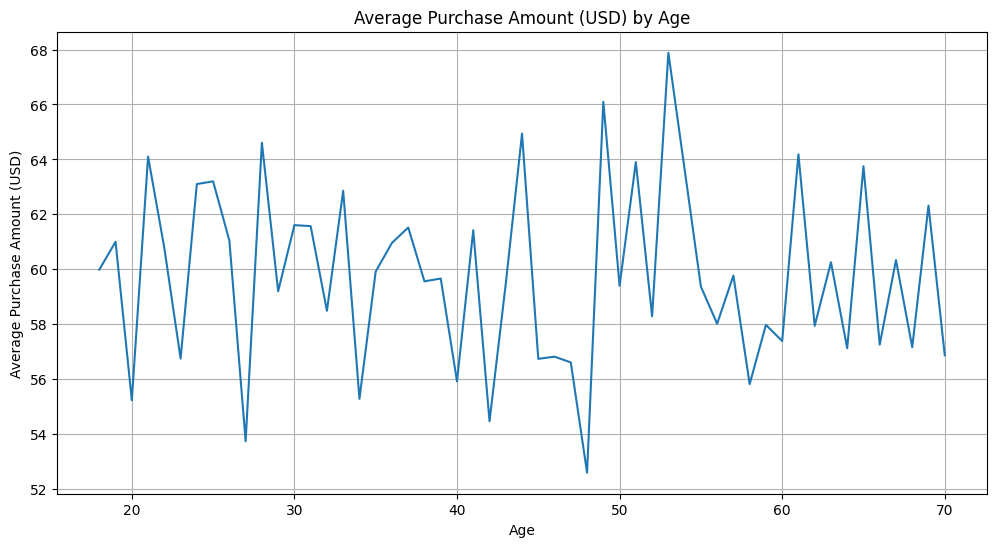

/tmp/ipython-input-4270933188.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='viridis')


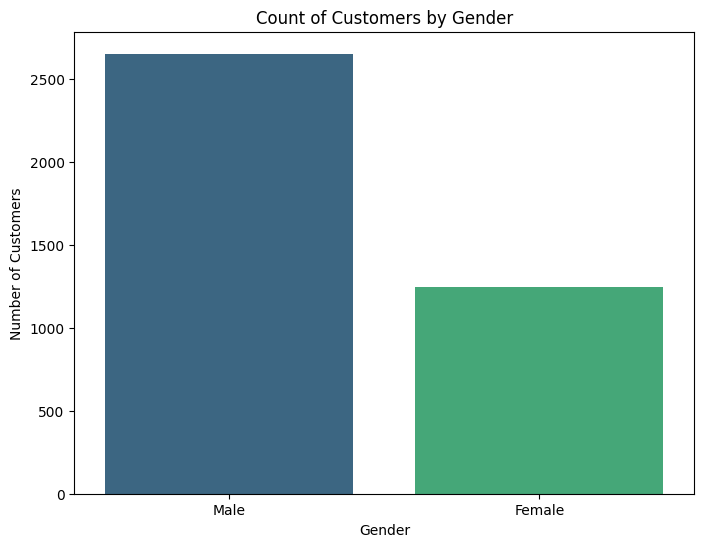

/tmp/ipython-input-4270933188.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_purchase_by_category, x='Category', y='Purchase Amount (USD)', palette='magma')


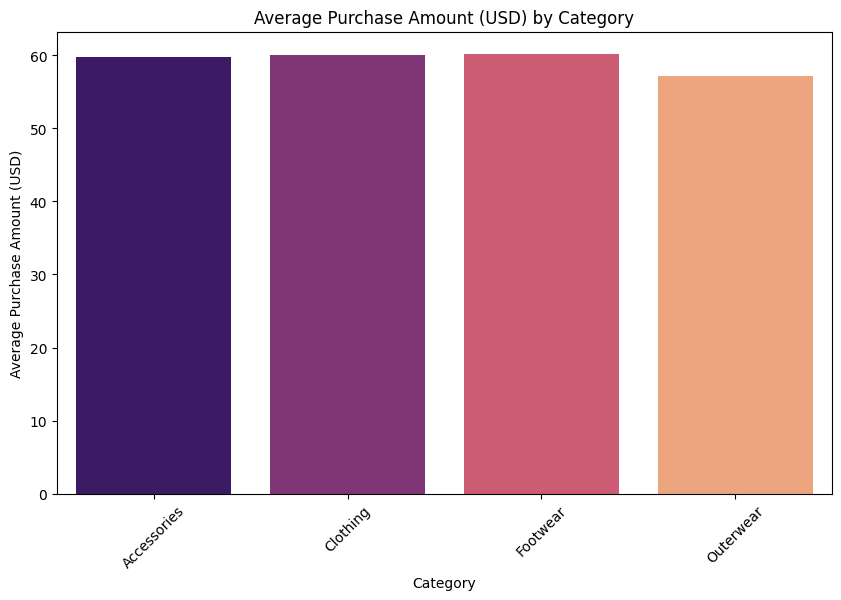

/tmp/ipython-input-4270933188.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Season', y='Purchase Amount (USD)', palette='plasma')


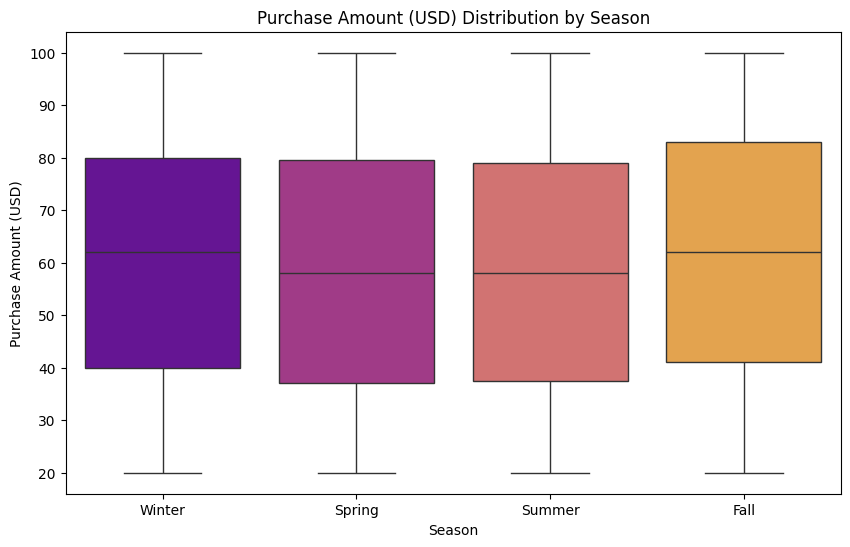

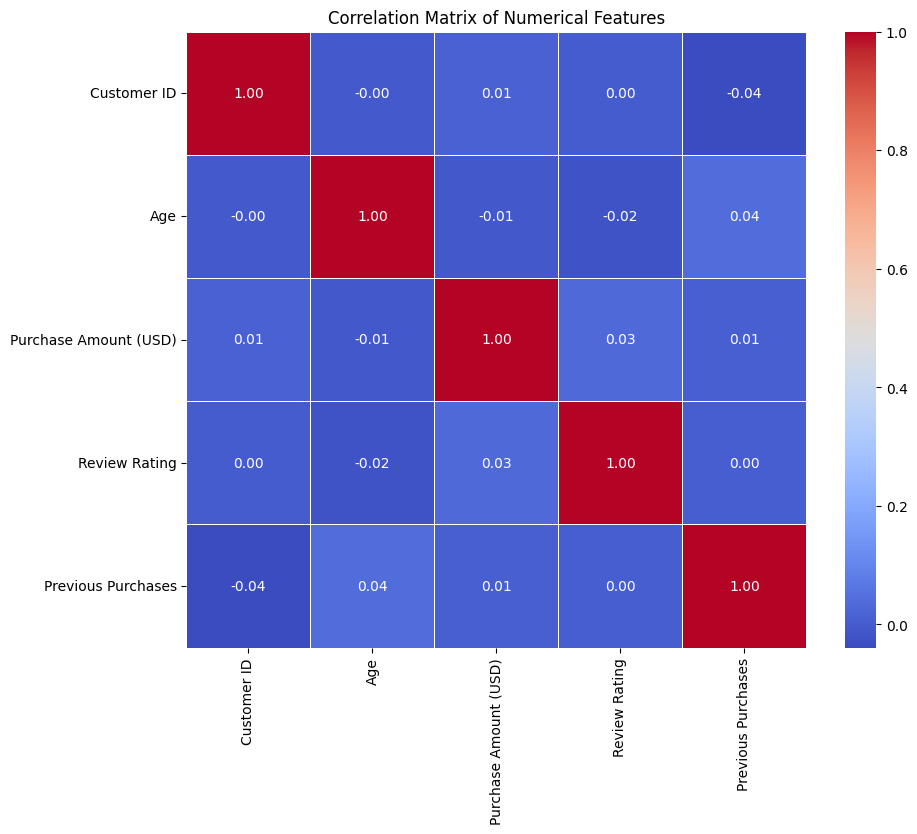

All requested visualizations have been generated.


In [15]:
print("Generating visualizations...")

numerical_cols_for_hist = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
plt.figure(figsize=(16, 12))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
for i, col in enumerate(numerical_cols_for_hist):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

avg_purchase_by_age = df.groupby('Age')['Purchase Amount (USD)'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_purchase_by_age, x='Age', y='Purchase Amount (USD)')
plt.title('Average Purchase Amount (USD) by Age')
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount (USD)')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', palette='viridis')
plt.title('Count of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

avg_purchase_by_category = df.groupby('Category')['Purchase Amount (USD)'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_purchase_by_category, x='Category', y='Purchase Amount (USD)', palette='magma')
plt.title('Average Purchase Amount (USD) by Category')
plt.xlabel('Category')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Season', y='Purchase Amount (USD)', palette='plasma')
plt.title('Purchase Amount (USD) Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.show()

correlation_matrix = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("All requested visualizations have been generated.")

Generating visualizations...


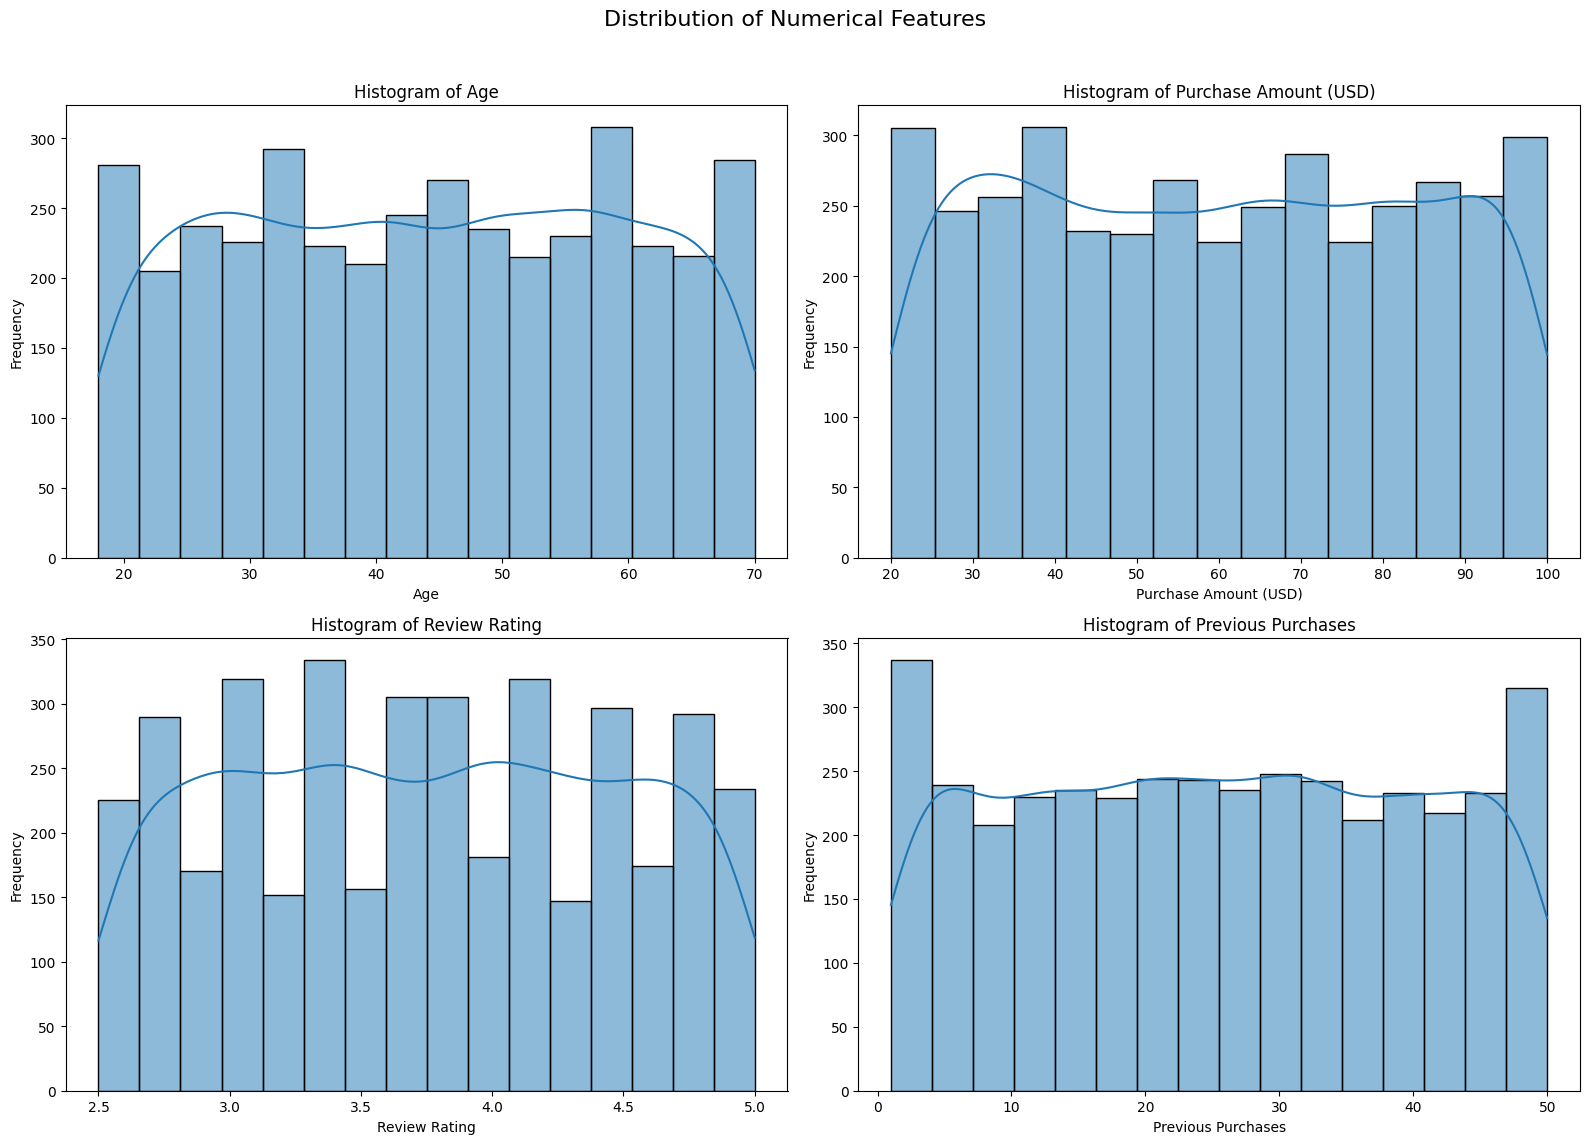

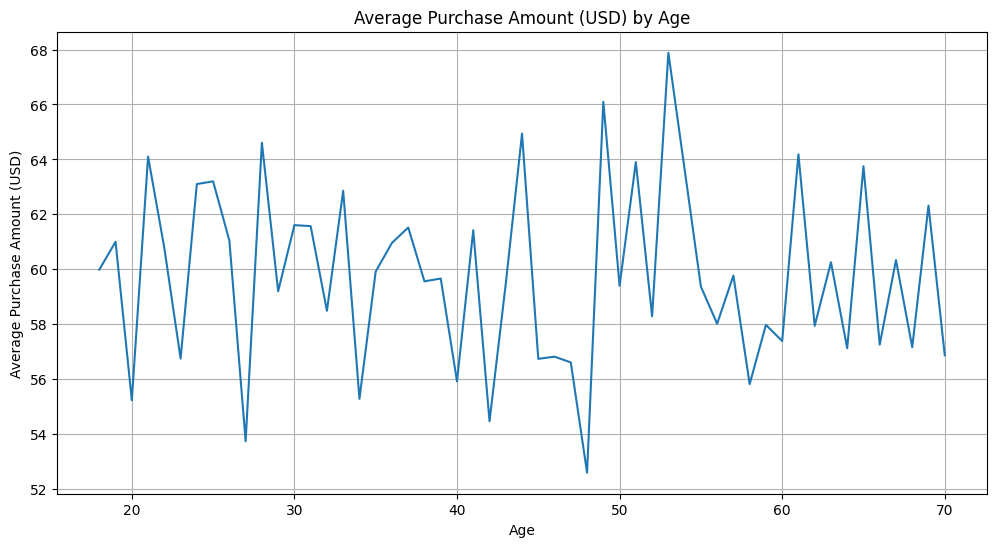

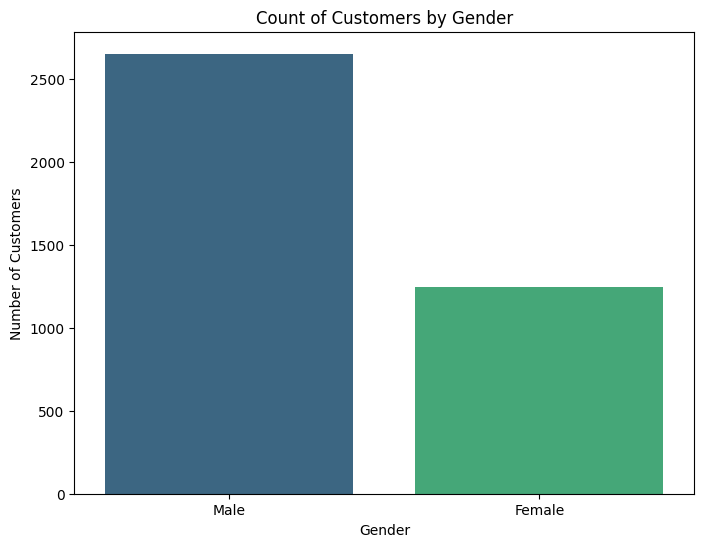

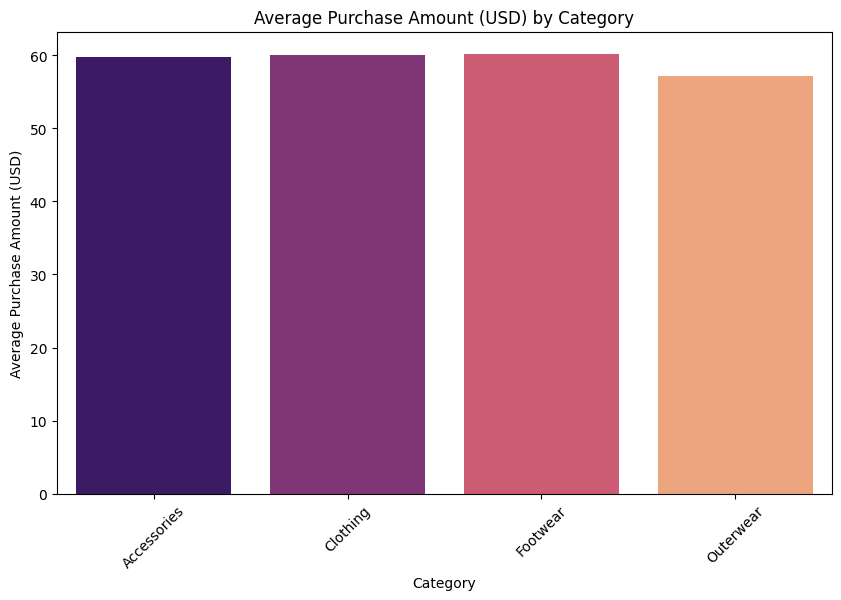

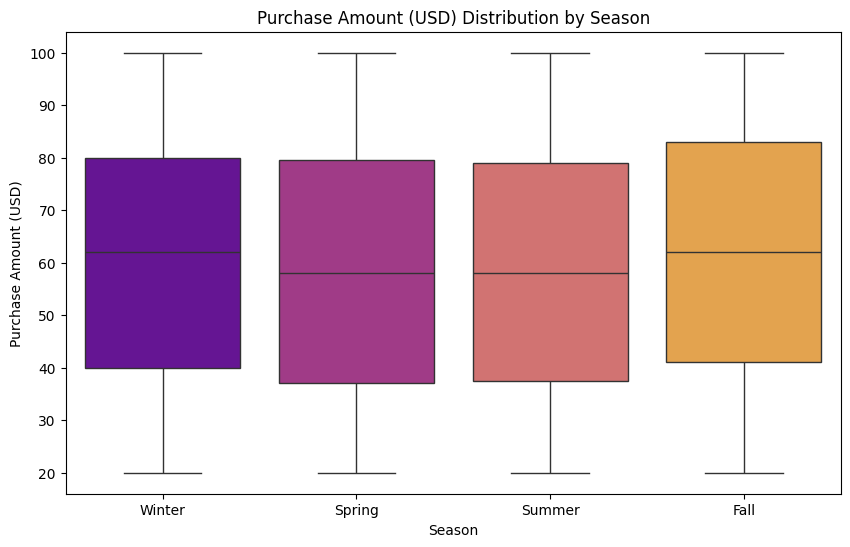

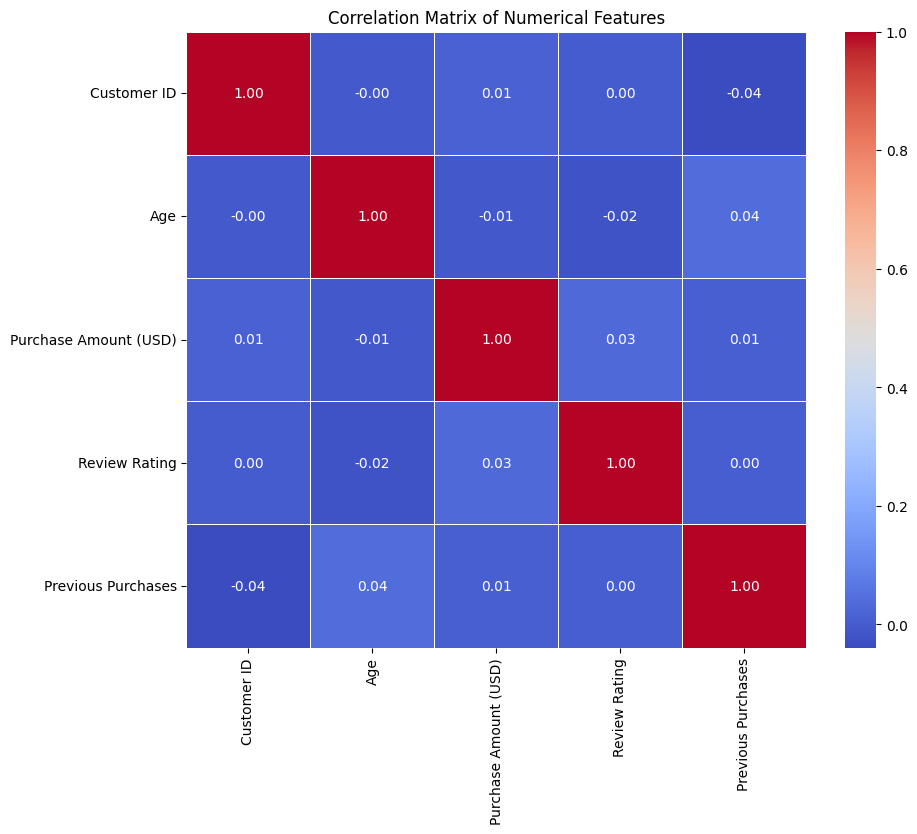

All requested visualizations have been generated.


In [16]:
print("Generating visualizations...")

numerical_cols_for_hist = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
plt.figure(figsize=(16, 12))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
for i, col in enumerate(numerical_cols_for_hist):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()


avg_purchase_by_age = df.groupby('Age')['Purchase Amount (USD)'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_purchase_by_age, x='Age', y='Purchase Amount (USD)')
plt.title('Average Purchase Amount (USD) by Age')
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount (USD)')
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Gender', palette='viridis', legend=False)
plt.title('Count of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()


avg_purchase_by_category = df.groupby('Category')['Purchase Amount (USD)'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_purchase_by_category, x='Category', y='Purchase Amount (USD)', hue='Category', palette='magma', legend=False)
plt.title('Average Purchase Amount (USD) by Category')
plt.xlabel('Category')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Season', y='Purchase Amount (USD)', hue='Season', palette='plasma', legend=False)
plt.title('Purchase Amount (USD) Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.show()


correlation_matrix = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("All requested visualizations have been generated.")